**Название проекта:** анализ способов увеличения выручки интернет-магазина

**Цель исследования:** определить самый эффективный способ увеличить выручку, провести и проаназировать результаты A/B-теста

**Период исследования:** 01.08.2019- 31.08.2019

**Данные для анализа:** информация о предлагаемых гипотезах и проведенном A/B тесте. Включает в себя: базу данных предлагаемых гипотез с кратким описанием и харакетиристиками по 10-балльным шкалам; данные по проведенному A/B тесту: информация о сделанных заказах, информация о посетителях сайта.

Данное исследование разделено на несколько частей:

1. Подготовка данных к анализу
2. Приоритизация предлагаемых гипотез и выбор представляющихся наиболее эффективными
3. Анализ результатов A/B теста
4. Принятие решение по результатам теста

# Часть 1: Приоритизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')  # загружаем локальный файл с гипотезами
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')    # альтернативный путь к данным для работы с других устройств

В начале исследования посмотрим на загруженный файл с гипотезами

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.options.display.max_colwidth = 130

In [5]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для приоритизации гипотез сначала применяем фреймворк ICE, сортируя их по убыванию приоритета:

In [6]:
hypothesis['ICE'] = round((hypothesis ['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis','ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее приоритетными гипотезами выступают предложение запустить акцию, дающую скидку на товар в день рождения. Кроме того высокий приоритет у добавления новых каналов привлечения траффика (2 место) и добавления формы подписки на все основные страницы (1 место).

Теперь применим фреймворк RICE для приоритизации гипотез, тоже сортируем их по убыванию приоритета.


In [7]:
hypothesis['RICE'] = round((hypothesis ['Reach']*hypothesis ['Impact'] * hypothesis['Confidence'])/hypothesis['Efforts'], 2)
display(hypothesis[['Hypothesis','RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении RICE ситуация изменилась: предложение добавить форму подписки вырвалось с третьего на первое место, уверенно занимая лидирующую позицию. Причина - добавление параментра reach в анализ, который показывает как много пользователей затронет гипотеза. Лидеры при применении ICE также были сильными гипотезами, но затрагивали меньшее количество пользователей. 

<b>**Вывод:**</b> наиболее приоритетной представляется гипотеза 'добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' -  лидер при применении фреймворка RICE. 
<br>
    <br>
    Гипотеза-лидер при применении фреймворка ICE "запустить акцию, дающую скидку на товар в день рождения" затрагивает лишь небольшое количество клиентов (именников не так много и не факт что именно в день рождения они решат заняться шоппингом). Нас интересует вопрос увелечения выручки интернет-магазина, охват пользователей для этих целей очень важен. </div>

# Часть 2:  Анализ A/B-теста

Мы провели A/B-тест и получили результаты о заказах и посетителях, которые в этой части исследования будут проанализированы

In [8]:
try:
    orders = pd.read_csv('orders.csv')  # загружаем локальный файл с данными о заказах
except:
    orders = pd.read_csv('/datasets/orders.csv')    # альтернативный путь к данным для работы с других устройств

In [9]:
try:
    visitors = pd.read_csv('visitors.csv')  # загружаем локальный файл с данными о посетителях
except:
    visitors = pd.read_csv('/datasets/visitors.csv')    # альтернативный путь к данным для работы с других устройств

## 2.1 Обработка данных

Загружаем данные для анализа и переходим к первичной необходимой обработке. Смотрим общую информацию о загруженных файлах:

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Файлы отличаются по структуре: в файле с посетителями агрегированные по признакам "дата" и "группа" данные за август 2019 года, когда был проведен A/B-тест. В файле с заказами более детальная информация по каждому заказу, включающая в себя идентификатор заказа и клиента. 
Тип данных полей с датами - object, необходимо исправить его на правильный.

In [14]:
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


С типом данных теперь все в порядке. Переименуем столбцы в файле с заказами в более удобные для прочтения:

In [18]:
orders.columns = ['order_id', 'visitor_id', 'date', 'revenue', 'group' ]

Смотрим есть ли в базах пропуски и явные дубликаты:

In [19]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [20]:
orders.isna().sum()

order_id      0
visitor_id    0
date          0
revenue       0
group         0
dtype: int64

In [21]:
visitors.duplicated().sum() 

0

In [22]:
orders.duplicated().sum() 

0

Пропусков и дубликатов нет. Теперь посмотрим все ли участники A/B-теста попали только в одну группу.

In [23]:
orders.groupby('group')['visitor_id'].count()  # посмотрим сколько участников по группам распределилось всего

group
A    557
B    640
Name: visitor_id, dtype: int64

In [24]:
orders.groupby('group')['visitor_id'].nunique()  # и сколько при этом было уникальными пользователями

group
A    503
B    586
Name: visitor_id, dtype: int64

Некоторые пользователи попали и в одну, и другую группу. Их данные представляется необходимым удалить из файла с заказами, т.к. непонятно что именно повлияло на их решение о заказе. Найдем id посетителей, которые попали сразу в обе группы при тесте  

In [25]:
# формируем сводную таблицу по id посетителей и считаем количество групп, в которых они участвовали

visitors_group_duplicate = orders.pivot_table(index = 'visitor_id', values = 'group', aggfunc = 'nunique')\
.reset_index().query('group > 1')

In [26]:
visitors_group_duplicate.count()

visitor_id    58
group         58
dtype: int64

In [27]:
# создаем лист с id,  которые попали и в одну и в другую группу

duplicate_list = list(visitors_group_duplicate[visitors_group_duplicate['group']!=1]['visitor_id'])

In [28]:
duplicate_list

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]

In [29]:
orders_clear = orders.query('visitor_id not in @duplicate_list')

In [30]:
orders_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    1016 non-null   int64         
 1   visitor_id  1016 non-null   int64         
 2   date        1016 non-null   datetime64[ns]
 3   revenue     1016 non-null   int64         
 4   group       1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


Количество заказов сократилось с 1197 до 1016 - это около 15%. Потеря значительная, но эти данные не подходили для анализа. К сожалению в файле visitors отсутствует информация по id пользователей и нет возможности удалить этих посетителей и оттуда. Файл visitors оставляем без изменений.

Предварительный анализ данных завершен, переходим к анализу проведенного теста.

# 2.2 Анализ A/B-теста

### 2.2.1 График кумулятивной выручки по группам

Рассчитаем максимальную дату тестирования и будем ежедневно считать результаты тестирования до последнего дня включительно, сохраняя их в ordersAggregated

In [31]:
ordersAggregated = orders_clear.apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], \
                                                                      orders_clear['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}),\
                                      axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [32]:
visitorsAggregated = visitors.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
             visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), \
                                    axis=1).sort_values(by=['date','group'])

Объединяем обе таблицы в одну:

In [33]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_clear[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_Aggregated = datesGroups.apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], \
        orders_clear['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique', \
                    'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
       visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
       .sort_values(by=['date','group'])
   
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = orders_Aggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [34]:
display(cumulativeData['date'].min())
display(cumulativeData['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Датафрейм cumulativeData был создан корректно, минимальная и максимальная дата соответствуют срокам проведения тестрирования </div>

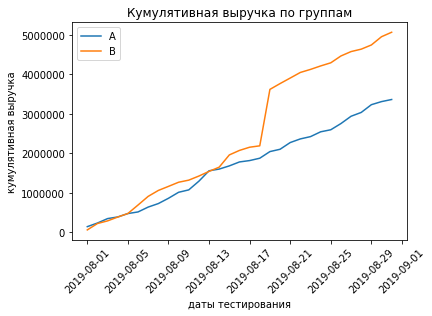

In [35]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# настраиваем параметры отображения графика
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.legend()
plt.xlabel('даты тестирования')
plt.ylabel('кумулятивная выручка')
plt.show()

Выручка группы B заметно привышает показатели группы A  примерно с середины тестирования. График выручки группы B  в нескольких точках резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Выручка группы A растет равномерно, без особых всплесков. 

### 2.2.2 График кумулятивного среднего чека по группам

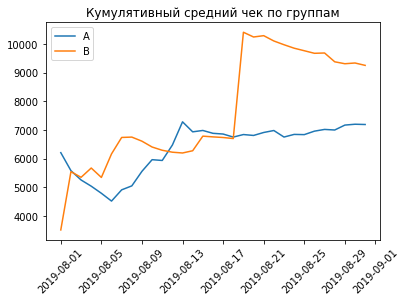

In [36]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 

# настраиваем параметры отображения графика
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.legend()
plt.show()

Возможно в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Рост среднего чека группы А более равномерен. 

### 2.2.3 Относительное изменение кумулятивного среднего чека по группам

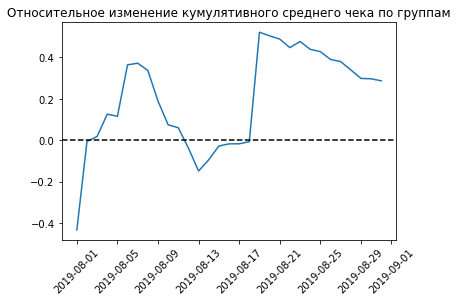

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', \
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']\
    /mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 


# настраиваем параметры отображения графика
plt.title('Относительное изменение кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

В нескольких точках график различия между сегментами резко «скачет» - наблюдаются крупные заказы и "выбросы". Примерно с середины тестирования средний чек группы B начинает уверенно лидировать.

### 2.2.4 Среднее количество заказов на посетителя по группам

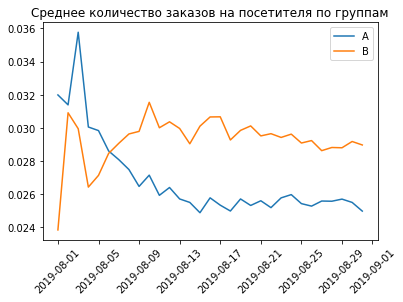

In [38]:
# считаем кумулятивное количество заказов на посетителя
cumulativeData['avg_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders'], label='B')
plt.legend()

# настраиваем параметры отображения графика
plt.title('Среднее количество заказов на посетителя по группам')
plt.xticks(rotation = 45)
plt.show()


Среднее количество заказов сначала резко "скакало",  но затем среднее кол-во заказов группы B вырвалось вперёд и зафиксировалась, а группы A  - просело и также зафиксировалось.

### 2.2.5 Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

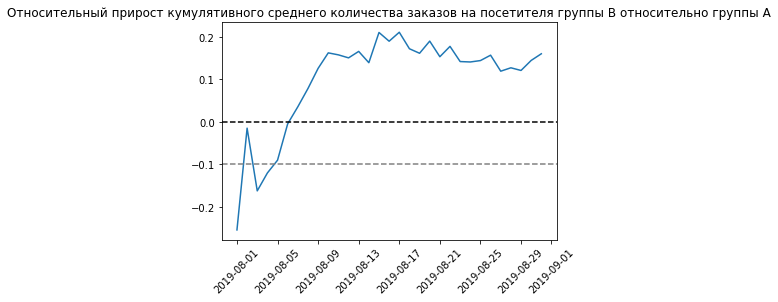

In [39]:
mergedCumulativeAvg_orders = cumulativeDataA[['date','avg_orders']].merge(cumulativeDataB[['date','avg_orders']],\
                                        left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeAvg_orders['date'], mergedCumulativeAvg_orders['avg_ordersB']\
         /mergedCumulativeAvg_orders['avg_ordersA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

# настраиваем параметры отображения графика
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.xticks(rotation = 45)
plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и стабилизировалась.

### 2.2.6 Количество заказов по пользователям

In [40]:
#  посчитаем количество заказов на 1 пользователя

ordersByUsers = (
    orders_clear.groupby('visitor_id', as_index=False)
    .agg({'order_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='visitor_id', ascending=False).head(10))

     visitor_id  orders
972  4283872382       1
971  4281247801       1
970  4279090005       1
969  4278982564       1
968  4259830713       1
967  4258103007       1
966  4251115836       1
965  4251087345       1
964  4243832526       1
963  4237561104       1


Построим точечную диаграмму числа заказов на одного пользователя:

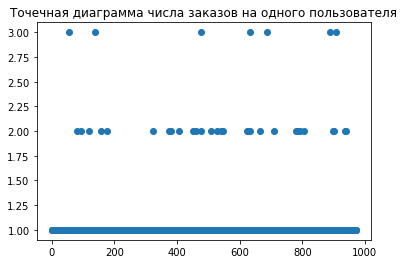

In [41]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

# настраиваем параметры отображения графика
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.show()

Сильных выбросов и аномалий нет, в среднем в очищенном датасете на пользователя приходится один заказ, у некоторых пользователей наблюдаются 2-3. Ради интереса подобный анализ был проведен на "сыром" датасете, без удаленных заказов, попавших в обе группы при тестировании - разброс и аномалии наблюдались (до 11 заказов на пользователя)

### 2.2.7 95-й и 99-й перцентили количества заказов на пользователя. Граница для определения аномальных пользователей.

In [42]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


Не более 1% пользователей оформляли больше чем 2 заказа. Можно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней (более 2 заказов - аномальные пользователи)

### 2.2.8 Точечный график стоимостей заказов

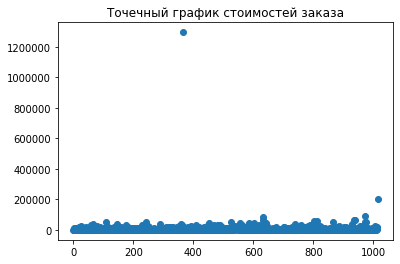

In [43]:
x_values = pd.Series(range(0,len(orders_clear['revenue'])))
plt.scatter(x_values, orders_clear['revenue']) 

# настраиваем параметры отображения графика
plt.title('Точечный график стоимостей заказа')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

Наблюдаются единичные выбросы - очень дорогие заказы, сильно выделяющиеся на фоне остальных.

График с ограничением значения по оси y:</div>

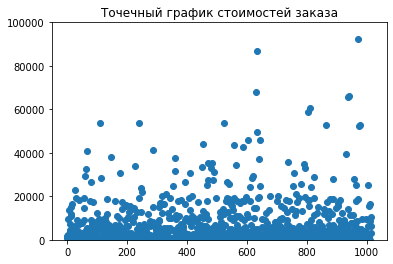

In [44]:
x_values = pd.Series(range(0,len(orders_clear['revenue'])))
plt.scatter(x_values, orders_clear['revenue']) 

# настраиваем параметры отображения графика
plt.title('Точечный график стоимостей заказа')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.ylim(0, 100000)  # вводим ограничение по оси y, чтобы поближе посмотреть на заказы
plt.show()

### 2.2.9 95-й и 99-й перцентили стоимости заказов. Граница для определения аномальных заказов

In [45]:
np.percentile(orders_clear['revenue'], [95, 99])


array([26785., 53904.])

In [46]:
orders_clear['revenue'].mean()

8300.814960629921

Не более 1% пользователей заплатили за товар свыше 53904 рублей, не более 5% - свыше 26785. Стоимость среднего заказа - 8300 рублей. Границей для определения аномальных заказов определим 99 перцентиль и отберем заказы не превышающие 53904 рублей.

### 2.2.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным 

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [47]:
#  подготавливаем данные, рассчитываем количество посетителей до выбранной даты

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#  подготавливаем данные, рассчитываем количество заказов до выбранной даты
ordersADaily = (
    orders_clear[orders_clear['group'] == 'A'][['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_clear[orders_clear['group'] == 'B'][['date', 'order_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [48]:
# создаем переменные ordersByUsersA и ordersByUsersB.
# в них для пользователей, которые заказывали хотя бы 1 раз, указываем число совершённых заказов.

ordersByUsersA = (
    orders_clear[orders_clear['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders_clear[orders_clear['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'order_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 


In [49]:
# объявляем переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# тем, кто ничего не заказал, будут соответствовать нули

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() \
                                                  - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() \
                                                  - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [50]:
# применяем критерий Манна-Уитни, округляем p-value

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('различие в среднем количестве заказов:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
различие в среднем количестве заказов: 0.160



Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
P-value 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Относительный выигрыш группы B равен 16%.

### 2.2.11 Статистическая значимость различий в среднем чеке на посетителя между группами по «сырым» данным 

Сформулируем гипотезы. Нулевая: различий в среднем чеке на посетителя между группами нет. Альтернативная: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.  </div>

In [51]:
# применяем критерий Манна-Уитни, округляем p-value

print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'],\
                                          orders_clear[orders_clear['group']=='B']['revenue'])[1]))
print('различия в среднем чеке:', '{0:.3f}'.format(orders_clear[orders_clear['group']=='B']['revenue']\
                       .mean()/orders_clear[orders_clear['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
различия в среднем чеке: 0.287


Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### 2.2.12 Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным 

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53904 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904 рублей — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [52]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], 99))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], 99))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_clear[orders_clear['revenue'] > int(np.percentile(orders_clear['revenue'], 99)) ]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers)
print(abnormalUsers.shape[0])

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
Name: visitor_id, dtype: int64
16


Всего 16 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [53]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [54]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различия в среднем числе заказов:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
различия в среднем числе заказов: 0.189


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B по-прежнему есть. P-value 0.007 (было 0.011) меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы по-прежнему отвергаем.  Относительный выигрыш группы B вырос с 16% и теперь равен 18.9%. Группа B на 18.9% чаще делала заказ, чем группа A.

Посмотрим что произошло с результатами по среднему чеку.

### 2.2.13 Статистическая значимость различий в среднем чеке на посетителя между группами по «очищенным» данным

In [55]:
print('p-value:',  '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_clear[
                np.logical_and(
                    orders_clear['group'] == 'A',
                    np.logical_not(orders_clear['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_clear[
                np.logical_and(
                    orders_clear['group'] == 'B',
                    np.logical_not(orders_clear['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('различия в среднем чеке:', 
    "{0:.3f}".format(
        orders_clear[
            np.logical_and(
                orders_clear['group'] == 'B',
                np.logical_not(orders_clear['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_clear[
            np.logical_and(
                orders_clear['group'] == 'A',
                np.logical_not(orders_clear['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.788
различия в среднем чеке: -0.032


P-value уменьшился с 0.829 до 0.788, но все равно значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
Средний чек группы B теперь ниже чем у группы A: относительный выигрыш 28.7% превратился в проигрыш в 3.2% 

Хотя общие выводы по результатам теста не изменились, изменения все же есть:

Различия в среднем числе заказов групп A и B по-прежнему есть - группа B чаще делала заказы (16% по "сырым данным",18.9% по "очищенным").
Не получилось отвергнуть гипотезу о том, что различий в среднем чеке между группами нет. Однако при этом в "сырых" данных у группы B был относительный выигрыш в 28.7%, а в "очищенных" он превратился в проигрыш в 3.2%. Отфильтрованные "дорогие" заказы, судя по всему, принадлежали именно группе B.

## 2.3 Принятие решения по результатам теста

**Результаты исследования:**
    
Для достижения поставленной цели "рост выручки интернет-магазина" было предложено 9 гипотез. В результате проведенного анализа приоритетной была выбрана гипотеза 'добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' -  лидер при применении фреймворка RICE. 
<br>
<br>
С 1 по 31 августа 2019 года был проведено A/B-тестирование.</div>

**Решение по результатам тестирования: останавливаем тест, зафиксировав победу группы В по количеству сделанных заказов.**

Группа B победила группу А по сделанному количеству заказов. Статистически значимые различия между группами есть, группа B чаще делала заказы (16% по "сырым данным",18.9% по "очищенным").
Различий между средним чеком при этом установить не удалось - по части среднего чека группы равны.

Продолжать тест не представляется целесообразным: он длился на протяжении месяца и показал статистически значимые результаты. 